In [1]:
#Import packages
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import numpy as np
import pandas as pd

In [2]:
signal = np.loadtxt('C:\\Database\\Sleep Aja Ga Sih!\\Dataset\\After Cut\\Normal\\a15_2.csv')[:]


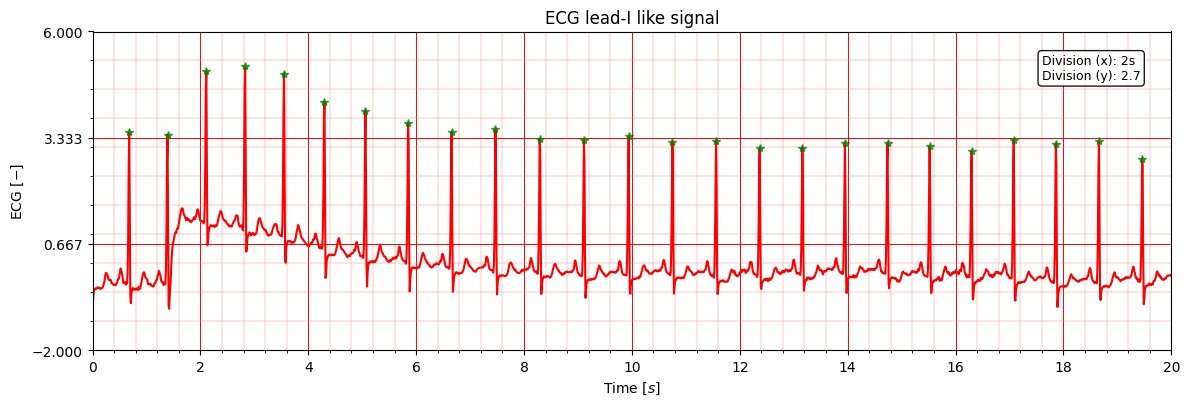

ReturnTuple(ecg_plot=<Figure size 1200x400 with 1 Axes>)

In [3]:
import pyhrv.tools as tools

# Plot the ECG signal (interval: 0s to 20s)
tools.plot_ecg(signal, sampling_rate = 100, interval=[0, 20])

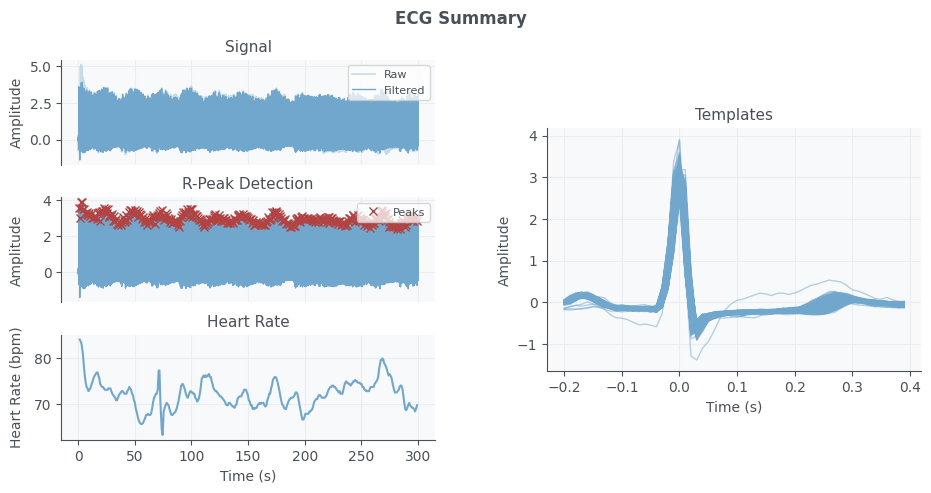

In [4]:
# Get R-peaks series using biosppy
t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal, sampling_rate=100)[:3]

In [5]:
# Computes basic statistical parameters from a series of heart rate (HR) data

#hr_mean (float): Mean heart rate [bpm]
#hr_min (int): Minimum heart rate [bpm]
#hr_max (int): Maximum heart rate [bpm]
#hr_std (float): Standard deviation of the heart rate series [bpm]

results_hrmean = td.hr_parameters(rpeaks=t[rpeaks])['hr_mean']


In [6]:
results_hrmean

72.37161736881342

In [7]:
results['hr_mean']

NameError: name 'results' is not defined

In [ ]:
results['hr_min']

53.57142857142857

In [ ]:
results['hr_max']

85.71428571428571

In [ ]:
results['hr_std']

3.2719151340166235

# SDNN

In [ ]:
#Computes the Standard Deviation of a NN interval series (SDNN)

#sdnn (float): Standard deviation of NN intervals [ms]

results = td.sdnn(rpeaks=t[rpeaks])

In [ ]:
results['sdnn']

38.1400461958708

# RMSSD

In [ ]:
#Computes the root mean of r-peaks
#rmssd (float): Root mean of R-peaks[ms]

results = td.rmssd(rpeaks=t[rpeaks])

In [ ]:
results['rmssd']

24.591012120182693

# SDSD

In [ ]:
#Standard deviation
#sdsd (float): Standard deviation[ms]

results = td.sdsd(rpeaks=t[rpeaks])

In [ ]:
results['sdsd']

22.12531881269548

# NN50

In [ ]:
#Derives the NN50 parameters: Finds number of NN interval differences greater than 50ms (NN50) and the ratio between NN50 and the total number of NN interval differences.
#nn50 (int): Number of NN interval differences greater 50 milliseconds

results = td.nn50(rpeaks=t[rpeaks])
results['nn50']

4

# PNN50

In [ ]:
#pnn50 (float): Ratio between NN50 and total number of NN intervals
results['pnn50']

1.1173184357541899

# Frequency Domain 

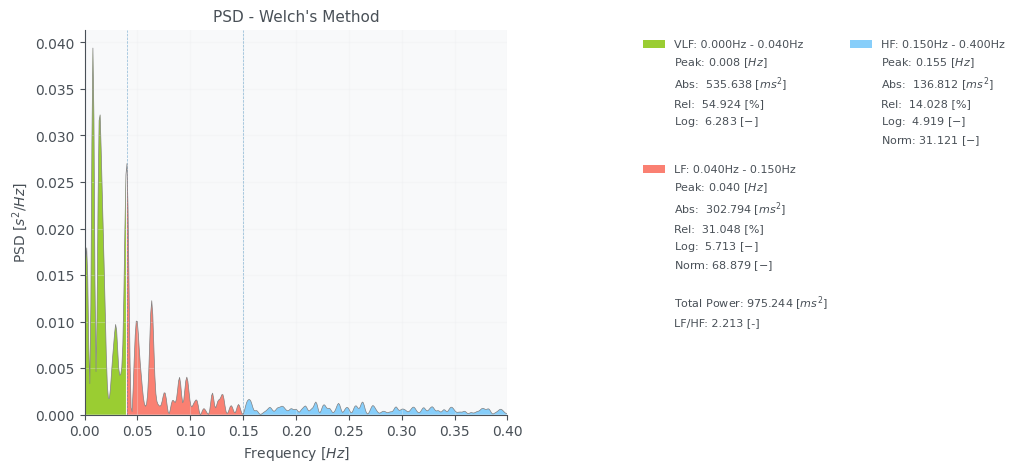

['fft_bands', 'fft_peak', 'fft_abs', 'fft_rel', 'fft_log', 'fft_norm', 'fft_ratio', 'fft_total', 'fft_plot', 'fft_nfft', 'fft_window', 'fft_resampling_frequency', 'fft_interpolation']


In [ ]:
# Compute the PSD and frequency domain parameters using the R-peak series
result = fd.welch_psd(rpeaks=t[rpeaks])
print(result.keys())

In [ ]:
result=result["fft_peak"]
Vlf = result[0]
LF = result[1]
HF = result[2]
print(Vlf,LF,HF, LFHF_Ratio)

0.0078125 0.0400390625 0.1552734375 2.2132154520049996


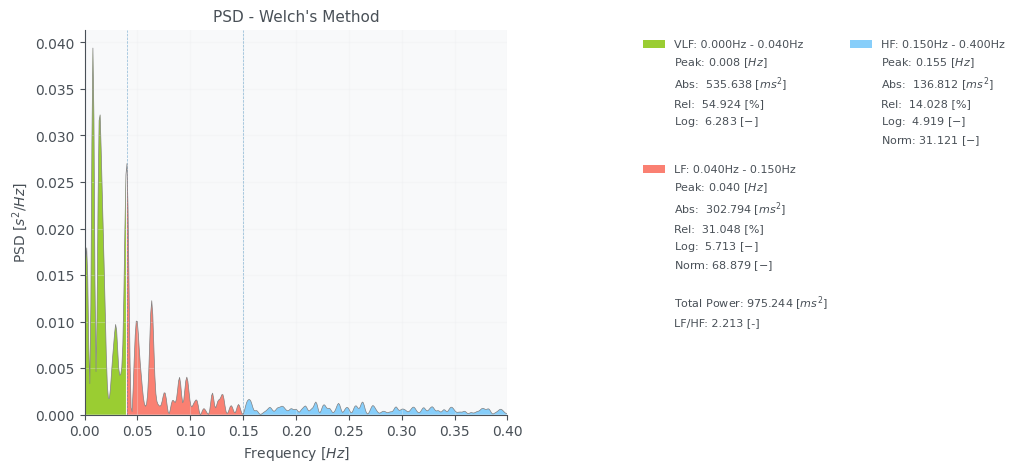

In [ ]:
result = fd.welch_psd(rpeaks=t[rpeaks], show=False)
LFHF_Ratio = result["fft_ratio"]

In [ ]:
LFHF_Ratio

2.2132154520049996

# Non Linier Poincare

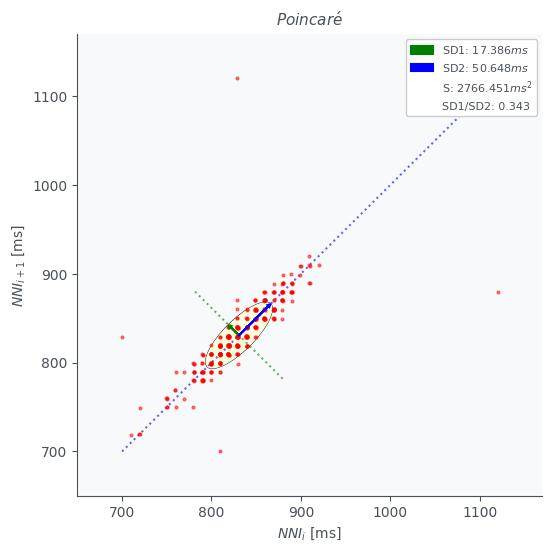

In [ ]:
# Import packages
import biosppy
import pyhrv
import pyhrv.nonlinear as nl

#t, filtered_signal, rpeaks = biosppy.signals.ecg.ecg(signal, sampling_rate=250)[:3]

# Compute Poincaré using R-peak series
results = pyhrv.nonlinear.poincare(rpeaks=t[rpeaks])
sd1_value = results['sd1']
sd2_value = results['sd2']
sd_ratio = results['sd_ratio']

In [ ]:
sd1_value

17.386303875949004

In [ ]:
sd2_value

50.64841707692836

In [ ]:
sd_ratio

2.9131215834201445

# Saving File 

In [ ]:
results_hrv = td.hr_parameters(rpeaks=t[rpeaks])
hr_mean_value = results_hrv["hr_mean"]
df_hr_mean = pd.DataFrame({'HR': [hr_mean_value]})

In [ ]:
results = td.sdnn(rpeaks=t[rpeaks])
sdnn_value = results["sdnn"]
df_sdnn = pd.DataFrame({'SDNN': [sdnn_value]})

In [ ]:
results = td.rmssd(rpeaks=t[rpeaks])
rmssd_value = results["rmssd"]
df_rmssd = pd.DataFrame({'RMSSD': [rmssd_value]})

In [ ]:
results = td.sdsd(rpeaks=t[rpeaks])
sdsd_value = results["sdsd"]
df_sdsd = pd.DataFrame({'SDSD': [sdsd_value]})

In [ ]:
results = td.nn50(rpeaks=t[rpeaks])
pnn50_value = results["pnn50"]
df_pnn50 = pd.DataFrame({'pNN50': [pnn50_value]})

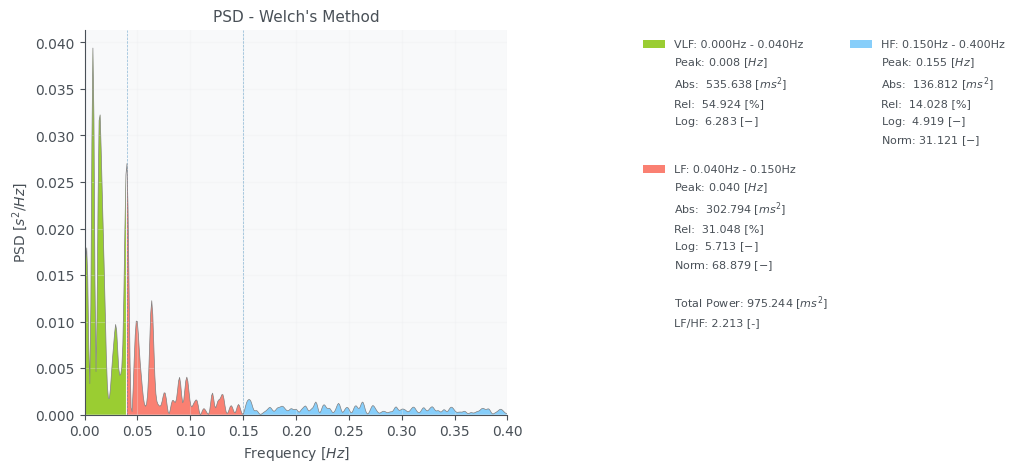

In [ ]:
result = fd.welch_psd(rpeaks=t[rpeaks])
result = result["fft_ratio"]
LFHF_Ratio = result
df_LFHF_Ratio = pd.DataFrame({'LF/HF': [LFHF_Ratio]})

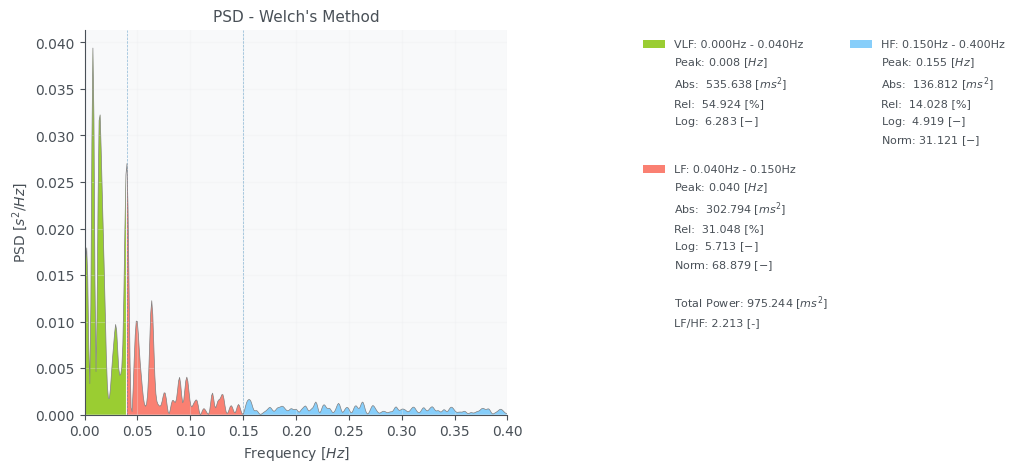

In [ ]:
result = fd.welch_psd(rpeaks=t[rpeaks], show=False)
result=result["fft_peak"]
LF = result[1]
HF = result[2]
df_lf = pd.DataFrame({'LF': [LF]})
df_hf = pd.DataFrame({'HF': [HF]})

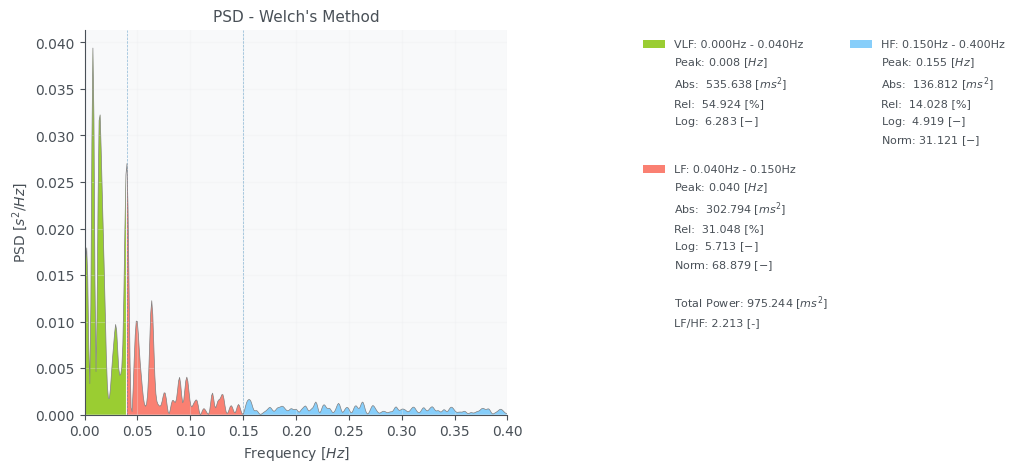

In [ ]:
lf_hf=fd.welch_psd(rpeaks=t[rpeaks], show=False)["fft_peak"]
LF = lf_hf[1]
HF = lf_hf[2]
df_lf = pd.DataFrame({'LF': [LF]})
df_hf = pd.DataFrame({'HF': [HF]})

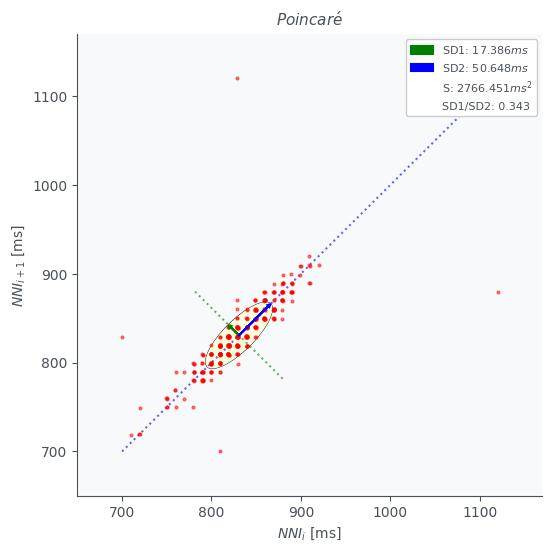

In [ ]:
results = nl.poincare(rpeaks=t[rpeaks])
sd1_value = results['sd1']
sd2_value = results['sd2']
sd_ratio_value = results['sd_ratio']
df_sd1 = pd.DataFrame({'SD1': [sd1_value]})
df_sd2 = pd.DataFrame({'SD2': [sd2_value]})
df_sd_ratio = pd.DataFrame({'SD_ratio': [sd_ratio_value]})

In [ ]:
df_result = pd.concat([df_hr_mean, 
                       df_sdnn, 
                       df_rmssd, 
                       df_sdsd, 
                       df_pnn50,
                       df_lf, 
                       df_hf,
                       df_LFHF_Ratio, 
                       df_sd1, 
                       df_sd2, 
                       df_sd_ratio], axis=1)
df1=pd.DataFrame(df_result)
df1

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio
0,72.371617,38.140046,24.591012,22.125319,1.117318,0.040039,0.155273,2.213215,17.386304,50.648417,2.913122
